In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

```quote
INCREASING HAZARD RATE OF MIXTURES FOR NATURAL EXPONENTIAL FAMILIES
https://www.jstor.org/stable/41714055?seq=1
```
[Block et al. 2005](https://linkinghub.elsevier.com/retrieve/pii/S0167715205001690) shows the case mixture of normal distributions with equal variance; [Liu and Liu 2008](https://linkinghub.elsevier.com/retrieve/pii/S0167715208000692) shows the case mixture of normal distributions with unequal variance (Figure 1);

In short, if |mu1 - mu2| <= 2 sigma, then the mixture is unimodal.
Bimodal requires mu1 and mu2 are far away from each other (i.e. |mu1 - mu2| > 2 sigma for equal variance case), and f(t) = p N(x|mu1, sigma1) + (1-p) N(x|mu2, sigma2) with mu1 < mu2, p needs to be small to have IHR, which is not what we want (we want p to be very big, i.e. big rewards with very small probability ).

However, if we consider absolute normal distribution, [which is not a member of the exponential family](https://arxiv.org/pdf/1402.3559.pdf). It means it's hard to find theoretical support about the IHR wrt mixture absolute normal distributions. Through my empirical test, the trend is the same as the mixture of Gaussian, i.e. p needs to be small.

## Mixture of Gaussian 

Gaussian $\frac1{\sigma\sqrt{2\pi}}\; \exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2} \right)$

f(t) = p N(x|mu1, sigma1) + (1-p) N(x|mu2, sigma2) with mu1 < mu2

### When p is small 

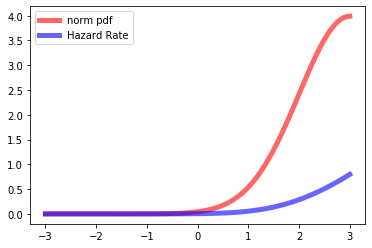

In [2]:
p = 1
mu1 = 3
sigma1 = 1
mu2 = 1.1
sigma2 = 1

x = np.linspace(-3, 3, 100)
hazard_rate = (p * norm.pdf(x, mu1, sigma1) + (1-p)*norm.pdf(x, mu2,sigma2))/(1 - p * norm.cdf(x, mu1, sigma1) - (1-p)*norm.cdf(x, mu2,sigma2))

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * norm.pdf(x, mu1, sigma1) + (1-p)*norm.pdf(x, mu2,sigma2)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, hazard_rate, 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

In [3]:
hazard_rate

array([6.07588286e-09, 8.72442987e-09, 1.24815786e-08, 1.77912626e-08,
       2.52667172e-08, 3.57516151e-08, 5.04019463e-08, 7.07951888e-08,
       9.90752045e-08, 1.38143676e-07, 1.91911868e-07, 2.65630204e-07,
       3.66317676e-07, 5.03318732e-07, 6.89022037e-07, 9.39783750e-07,
       1.27710779e-06, 1.72914726e-06, 2.33260509e-06, 3.13512794e-06,
       4.19830648e-06, 5.60141612e-06, 7.44605727e-06, 9.86188102e-06,
       1.30136168e-05, 1.71096513e-05, 2.24124442e-05, 2.92511025e-05,
       3.80364745e-05, 4.92791640e-05, 6.36108995e-05, 8.18097308e-05,
       1.04829551e-04, 1.33834464e-04, 1.70238529e-04, 2.15751398e-04,
       2.72430367e-04, 3.42739274e-04, 4.29614655e-04, 5.36539424e-04,
       6.67624258e-04, 8.27696642e-04, 1.02239738e-03, 1.25828411e-03,
       1.54294101e-03, 1.88509377e-03, 2.29472823e-03, 2.78321109e-03,
       3.36341041e-03, 4.04981340e-03, 4.85863862e-03, 5.80793937e-03,
       6.91769480e-03, 8.20988505e-03, 9.70854671e-03, 1.14398048e-02,
      

In [4]:
all(i < j for i, j in zip(hazard_rate, hazard_rate[1:])) 

True

### When p is large

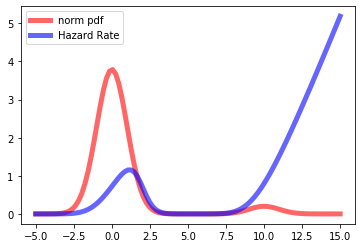

In [5]:
p = 0.95 
mu = 10
sigma = 1

x = np.linspace(-5, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma))/(1 - p * norm.cdf(x) - (1-p)*norm.cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

## Mixture of Absolute Gaussian

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \, e^{ -\frac{(x-\mu)^2}{2\sigma^2} } + \frac{1}{\sigma\sqrt{2\pi}} \, e^{ -\frac{(x+\mu)^2}{2\sigma^2} }$$

$$F(x) = \frac{1}{2}\left[ \mbox{erf}\left(\frac{x+\mu}{\sigma\sqrt{2}}\right) + \mbox{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

In [6]:
# absolute normal 

from scipy.special import erf

def pdf(x, mu = 0, sigma = 1):
    return 1.0/np.sqrt(2 * np.pi * sigma ** 2) * (np.exp(- 1.0/(2 * sigma**2) * (x -mu)** 2) + np.exp(- 1.0/(2 * sigma**2) * (x +mu)** 2 ))

def cdf(x, mu = 0, sigma = 1):
    return 1.0/2 * (erf((x-mu)/ np.sqrt(2 * sigma ** 2)) + erf((x+mu)/ np.sqrt(2 * sigma ** 2)))

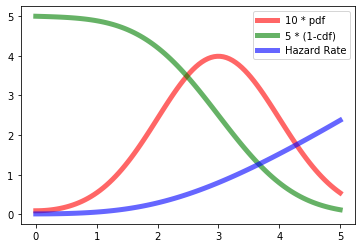

In [7]:
mu = 3
sigma = 1

x = np.linspace(0, 5, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * pdf(x, mu,sigma),'r-', lw=5, alpha=0.6, label='10 * pdf')
ax.plot(x, 5 * (1 - cdf(x, mu,sigma)), 'g-', lw=5, alpha=0.6, label='5 * (1-cdf)')
ax.plot(x, (pdf(x, mu,sigma))/(1 - cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

In [8]:
hazard_rate = pdf(x, mu,sigma)/(1 - cdf(x, mu,sigma))
all(i < j for i, j in zip(hazard_rate, hazard_rate[1:])) 

True

### When p is small 

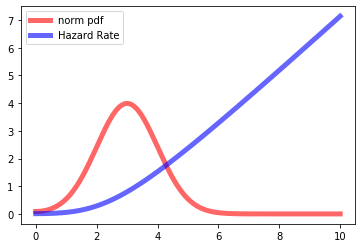

In [67]:
p = 1
mu1 = 3
sigma1 = 1
mu2 = 3
sigma2 =  2


x = np.linspace(0, 10, 1000)

hazard_rate = (p * pdf(x, mu1, sigma1) + (1-p)*pdf(x, mu2,sigma2))/(1 - p * cdf(x, mu1, sigma1) - (1-p)*cdf(x, mu2,sigma2))

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x, mu1, sigma1) + (1-p)*pdf(x, mu2,sigma2)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, hazard_rate, 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

In [68]:
hazard_rate

array([0.0088637 , 0.00886804, 0.00887949, 0.00889805, 0.00892374,
       0.00895657, 0.00899655, 0.00904369, 0.00909803, 0.00915958,
       0.00922836, 0.00930441, 0.00938776, 0.00947843, 0.00957648,
       0.00968192, 0.00979481, 0.00991519, 0.01004311, 0.01017861,
       0.01032175, 0.01047259, 0.01063117, 0.01079757, 0.01097184,
       0.01115405, 0.01134427, 0.01154256, 0.01174901, 0.01196368,
       0.01218665, 0.01241801, 0.01265784, 0.01290623, 0.01316325,
       0.01342901, 0.0137036 , 0.0139871 , 0.01427963, 0.01458128,
       0.01489214, 0.01521234, 0.01554197, 0.01588115, 0.01622999,
       0.01658859, 0.01695709, 0.01733559, 0.01772421, 0.01812309,
       0.01853234, 0.01895209, 0.01938248, 0.01982362, 0.02027566,
       0.02073874, 0.02121298, 0.02169852, 0.02219552, 0.0227041 ,
       0.02322442, 0.02375662, 0.02430085, 0.02485725, 0.02542599,
       0.02600721, 0.02660106, 0.02720771, 0.0278273 , 0.02846001,
       0.02910599, 0.02976539, 0.03043839, 0.03112515, 0.03182

In [69]:
all(i < j for i, j in zip(hazard_rate, hazard_rate[1:])) 

True

In [70]:
np.min(hazard_rate)

0.008863696823876015

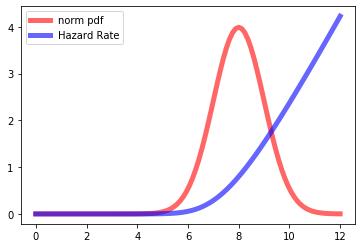

In [13]:
p = 1
mu = 10
sigma = 1

x = np.linspace(0, 12, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x, 8, 1) + (1-p)*pdf(x, mu,sigma)) ,'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * pdf(x, 8, 1) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x, 8, 1) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

In [14]:
np.median(10 * (p * pdf(x) + (1-p)*pdf(x, mu,sigma)))

1.2940293183452653e-07

### When p is large

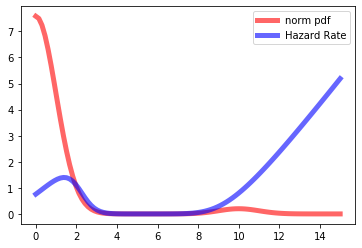

In [15]:
p = 0.95
mu = 10
sigma = 1

x = np.linspace(0, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x) + (1-p)*pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * pdf(x) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

## With Outliers in draft paper

### AbsGau+Outlier (AbsGau)

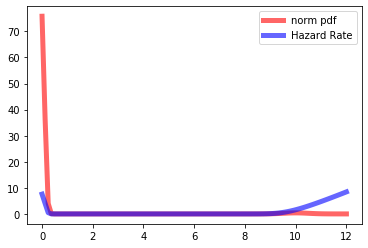

In [16]:
p = 0.95
mu = 10
sigma = 0.5

x = np.linspace(0, 12, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x, 0, 0.1) + (1-p)*pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * pdf(x, 0, 0.1) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

### Exp + Outlier (AbsGau)

In [17]:
from scipy.stats import expon

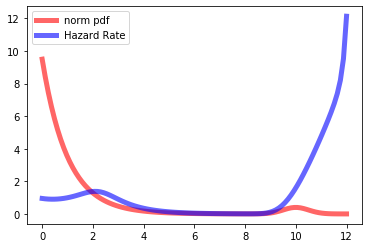

In [18]:
p = 0.95
mu = 10
sigma = 0.5

x = np.linspace(0, 12, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * expon.pdf(x) + (1-p)*pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * expon.pdf(x) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()